In [202]:
import numpy as np
import matplotlib.pyplot as plt


def initialize_particles(n, radius):
    """ Initialize particles randomly within a circle of given radius. """
    angles = np.random.uniform(0, 2 * np.pi, n)
    radii = radius * np.sqrt(np.random.uniform(0, 1, n))
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.column_stack((x, y))

def compute_forces_and_energy_vectorized(particles, radius):
    """ Compute the forces and energy for the current configuration of particles using vectorized operations. """
    n = len(particles)
    diff = particles[:, np.newaxis, :] - particles[np.newaxis, :, :]
    distances = np.linalg.norm(diff, axis=2)
    np.fill_diagonal(distances, np.inf)
    energy = np.sum(1 / distances[np.triu_indices(n, 1)])
    forces = np.sum(diff / distances[:,:,np.newaxis]**3, axis=1)
    outside = np.linalg.norm(particles, axis=1) > radius
    direction = -particles[outside] / np.linalg.norm(particles[outside], axis=1)[:, np.newaxis]
    forces[outside] += direction * 100
    return forces, energy

def update_particle_positions(particles, forces, step_size, radius):
    """ Update the positions of particles based on the forces and handle boundary conditions. """
    new_particles = particles + forces * step_size

    # Handle boundary conditions
    for i, particle in enumerate(new_particles):
        if np.linalg.norm(particle) > radius:
            # Reposition inside the circle at the nearest point
            direction = particle / np.linalg.norm(particle)
            new_particles[i] = direction * radius

    return new_particles


def simulate_charged_particles_annealing(n, radius, steps, initial_step_size, final_step_size, initial_temp, final_temp):
    """ Simulate the charged particles with simulated annealing to avoid local minima. """
    particles = initialize_particles(n, radius)
    min_energy_config = None
    min_energy = np.inf
    energies = []
    temperature = initial_temp
    step_size = initial_step_size

    # Calculate the cooling and step size rates
    cooling_rate = (final_temp / initial_temp) ** (1 / steps)
    step_rate = (final_step_size / initial_step_size) ** (1 / steps)

    for _ in range(steps):
        
        forces, energy = compute_forces_and_energy_vectorized(particles, radius)
        new_particles = update_particle_positions(particles, forces, step_size,1)
        new_forces, new_energy = compute_forces_and_energy_vectorized(new_particles, radius)

        if new_energy < energy or np.random.rand() < np.exp((energy - new_energy) / temperature):
            particles = new_particles
            energy = new_energy

        if energy < min_energy:
            min_energy = energy
            min_energy_config = particles.copy()

        energies.append(energy)
        temperature *= cooling_rate
        step_size *= step_rate
        print(_, np.exp((energy - new_energy) / temperature))
    return min_energy_config, min_energy, energies

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 7.1603677909582665e-06
7 6.260120417208748e-06
8 5.456420425999728e-06
9 4.740949090302872e-06
10 4.105892000399663e-06
11 3.543926627682387e-06
12 3.048208953888725e-06
13 2.6123592242001747e-06
14 2.2304468883475763e-06
15 1.8969747996916102e-06
16 1.6068627475668765e-06
17 1.3554304032247204e-06
18 1.1383797639827693e-06
19 9.517771842822798e-07
20 7.920350855313076e-07
21 6.558934390582881e-07
22 5.404011184165889e-07
23 4.4289721799209056e-07
24 3.609924349749805e-07
25 2.9255061069042365e-07
26 2.3567052537563083e-07
27 1.8866803747505587e-07
28 1.5005865455174315e-07
29 1.1854061793007431e-07
30 9.297857719750973e-08
31 7.238792385643554e-08
32 5.591984566481932e-08
33 4.284715476297463e-08
34 3.2550933571063174e-08
35 2.450803284958959e-08
36 1.8279446374709328e-08
37 1.3499576550893936e-08
38 9.866395172879311e-09
39 7.132493617467772e-09
40 5.097007198467782e-09
41 3.5983894415585944e-09
42 2.508003807135734e-09
43 1.7244930752187718e-09


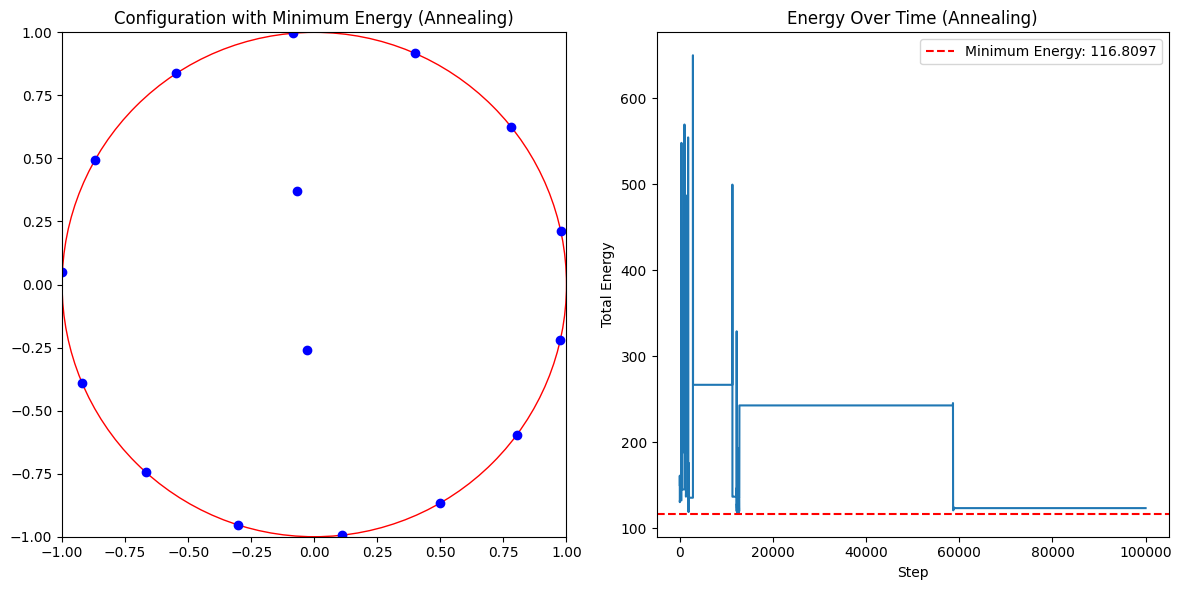

In [203]:

# Parameters
n_particles = 16  # Number of particles
circle_radius = 1  # Radius of the circle
simulation_steps = 20_000  # Number of steps in the simulation
initial_step_size = 0.01
final_step_size = 0.001
initial_temperature = 1000 # Initial temperature
final_temperature = 0.01  # Final temperature

# # Parameters
# n_particles = 16  # Number of particles
# circle_radius = 1  # Radius of the circle
# simulation_steps = 100000  # Number of steps in the simulation
# initial_step_size = 0.01
# final_step_size = 0.001
# initial_temperature = 100 # Initial temperature
# final_temperature = 0.01  # Final temperature


# Run the simulation with simulated annealing
annealing_particles, annealing_min_energy, annealing_energy_over_time = simulate_charged_particles_annealing(
    n_particles, circle_radius, simulation_steps, initial_step_size, final_step_size, initial_temperature, final_temperature
)

# Plotting
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Configuration with minimum energy (annealing)
circle = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax[0].add_artist(circle)
ax[0].scatter(annealing_particles[:, 0], annealing_particles[:, 1], color='blue')
ax[0].set_xlim([-circle_radius, circle_radius])
ax[0].set_ylim([-circle_radius, circle_radius])
ax[0].set_title("Configuration with Minimum Energy (Annealing)")
ax[0].set_aspect('equal', 'box')

# Energy over time (annealing)
ax[1].plot(annealing_energy_over_time)
ax[1].set_title("Energy Over Time (Annealing)")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Total Energy")
ax[1].axhline(y=annealing_min_energy, color='r', linestyle='--', label=f'Minimum Energy: {annealing_min_energy:.4f}')
ax[1].legend()

plt.tight_layout()
plt.show()